In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Oasis Internship/Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df.shape

In [ ]:
df.columns.values.tolist()

['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

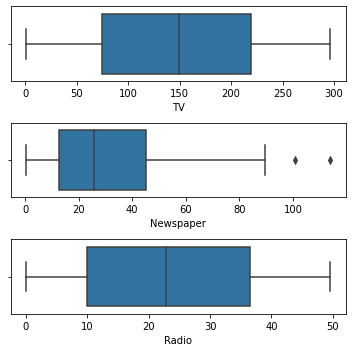

In [ ]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

In [ ]:
sns.distplot(df['Newspaper'])

In [ ]:
iqr = df.Newspaper.quantile(0.75) - df.Newspaper.quantile(0.25)
lower_bridge = df["Newspaper"].quantile(0.25) - (iqr*1.5)
upper_bridge = df["Newspaper"].quantile(0.75) + (iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
93.625


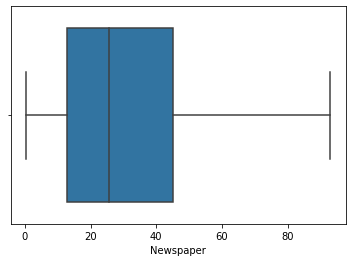

In [ ]:
data = df.copy()
data.loc[data['Newspaper']>=93, 'Newspaper']=93
sns.boxplot(data['Newspaper'])

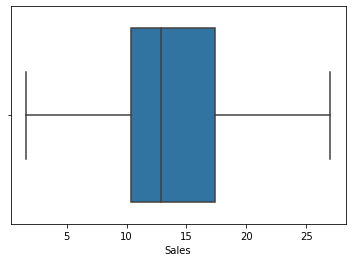

In [ ]:
sns.boxplot(data['Sales']);

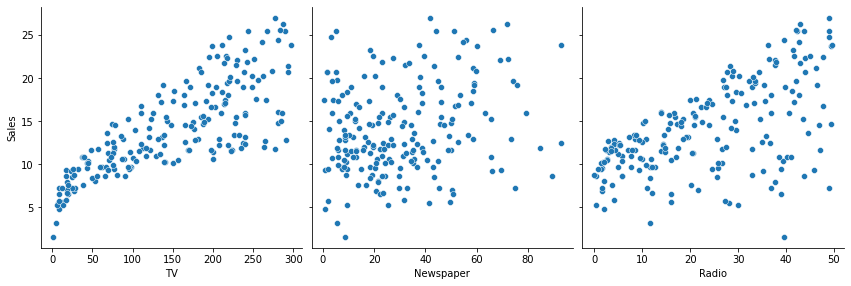

In [ ]:
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'],
            y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

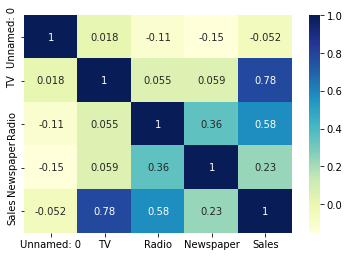

In [ ]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [ ]:
important_features = list(df.corr()['Sales'][(df.corr()['Sales']>+0.5)|(df.corr()['Sales']<-0.5)].index)


In [ ]:
print(important_features)


['TV', 'Radio', 'Sales']


In [ ]:

X = data['TV']
y = data['Sales']
X = X.values.reshape(-1,1)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.33)


In [ ]:
print(X_train.shape,y_train.shape)

(134, 1) (134,)


In [ ]:
from sklearn.neighbors import KNeighborsRegressor


In [ ]:
knn = KNeighborsRegressor().fit(X_train, y_train)
knn

KNeighborsRegressor()

In [ ]:
knn_train_pred = knn.predict(X_train)
knn_test_pred = knn.predict(X_test)

In [ ]:
print(knn_train_pred, knn_test_pred)

[20.8  13.08 20.82 17.46 16.06 17.78 13.08 20.68 16.58 17.1  16.06 16.56
  7.52  8.54 17.66 10.18 17.36 14.28  9.18 10.76 12.58 17.5  12.34  9.62
 14.6   7.52  9.98  4.34 17.28 10.32 14.78 13.36  6.76  9.84 11.3  19.94
 14.74 17.78  9.8  17.1  16.94 10.3  16.06 11.3  15.28 20.82 14.74 18.34
  6.76 11.04 15.76 19.68  6.76 17.84 20.38 20.82  9.84 10.18 11.3  17.28
 20.82 16.62 17.32 10.86 14.6  12.9   9.18 14.66  5.48  9.84  5.48 17.32
 11.3  14.36 14.36 17.78 11.04 17.4  12.82 12.58 16.06 16.06  9.9  14.82
 13.08 15.28  9.54 17.4  16.2   7.3  17.66 16.62 13.66 21.56 10.44 12.34
 15.1  14.66 17.1  18.78 12.9  17.1  14.74 14.74 17.32 17.   18.78 10.44
 10.3   5.48  5.9  12.58  7.52 14.82 10.18 16.52 15.28  8.54  4.34 14.82
 20.36 10.86 11.3  20.82 14.52  6.76 18.26 19.94  9.58 17.78  9.44 16.2
  9.26 17.66] [ 4.34 15.28 11.04 12.58 11.3  14.82 16.18 11.3  10.76 19.68  5.48 19.28
 11.4  16.6  17.84 10.76 12.82 16.18  9.54 19.02 13.7   9.84 17.46 20.68
  9.26 17.28 17.32  7.52 16.62 17.28  